In [103]:
import requests
import time
import numpy as np
import pandas as pd
from datetime import date,datetime,timezone
from matplotlib import pyplot as plt
from matplotlib import rcParams

# settings to make larger plots
rcParams['figure.figsize'] = [20, 9]
plt.rcParams.update({'font.size': 22})

In [181]:
# get the stocks belonging to the S&P 500
base_url = "https://finnhub.io/api/v1/index/constituents"

finn_key = "YOUR API KEY GOES HERE"

params = {'symbol':'^GSPC',
          'token':finn_key}
all_stocks = requests.get(base_url,params=params).json()
stock_df = pd.DataFrame(all_stocks)
stock_df

,constituents,symbol
0,UAL,^GSPC
1,CTSH,^GSPC
2,AXP,^GSPC
3,DVA,^GSPC
4,INFO,^GSPC
...,...,...
501,URI,^GSPC
502,MRK,^GSPC
503,PNC,^GSPC
504,LNC,^GSPC


In [182]:
# add columns for the start price (value 5 years ago)
# and stop price (current price)
stock_df['start price'] = ''
stock_df['stop price'] = ''
stock_df

,constituents,symbol,start price,stop price
0,UAL,^GSPC,,
1,CTSH,^GSPC,,
2,AXP,^GSPC,,
3,DVA,^GSPC,,
4,INFO,^GSPC,,
...,...,...,...,...
501,URI,^GSPC,,
502,MRK,^GSPC,,
503,PNC,^GSPC,,
504,LNC,^GSPC,,


In [188]:
# set the start and finish dates 
start = int(datetime(2015,9,9).timestamp())
end = int(datetime(2020,9,9).timestamp())
oneweek = 24*7*3600

In [185]:
# iterate through stocks in S&P 500
for index, row in stock_df.iterrows():
    base_url = "https://finnhub.io/api/v1/stock/candle"
    # from and to are UNIX timestamps defined as number of seconds
    # from midnight Jan 1, 1970
    # pull the prices from 9-9-15
    params = {'symbol':row.constituents,
              'resolution':'W',
              'from':start,
              'to':start+oneweek,
              'token':finn_key}
    print(index, 'getting data for ',row.constituents)
    response = requests.get(base_url,params=params)
    # try to add the data to the dataframe
    try:
        data = response.json()
        # get the closing price
        closing = data['c'][0]
        stock_df.loc[index,'start price']=closing
    # if error print message and drop the row
    except:
        print('unable to get data for ',row.constituents)
        stock_df.drop(index=index, inplace=True)
    # wait to limit call rate
    time.sleep(0.05)
    
stock_df.head(10)

0 getting data for  UAL
1 getting data for  CTSH
2 getting data for  AXP
3 getting data for  DVA
4 getting data for  INFO
5 getting data for  QRVO
6 getting data for  GLW
7 getting data for  PLD
8 getting data for  FTI
9 getting data for  INCY
10 getting data for  TWTR
11 getting data for  GD
12 getting data for  GOOGL
13 getting data for  AMGN
14 getting data for  OXY
15 getting data for  DLTR
16 getting data for  IEX
17 getting data for  AJG
18 getting data for  NVR
20 getting data for  ANET
21 getting data for  SRE
22 getting data for  SYF
23 getting data for  WM
24 getting data for  LDOS
25 getting data for  KMX
26 getting data for  ACN
27 getting data for  CCI
28 getting data for  CMI
29 getting data for  SLB
30 getting data for  GS
31 getting data for  MTD
32 getting data for  PXD
33 getting data for  MET
34 getting data for  EA
35 getting data for  SLG
36 getting data for  POOL
37 getting data for  AEE
38 getting data for  DUK
39 getting data for  GOOG
40 getting data for  GE
41

unable to get data for  LHX
297 getting data for  TGT
unable to get data for  TGT
298 getting data for  AMP
unable to get data for  AMP
299 getting data for  UDR
unable to get data for  UDR
300 getting data for  ADSK
unable to get data for  ADSK
301 getting data for  VIAC
unable to get data for  VIAC
302 getting data for  MCHP
unable to get data for  MCHP
303 getting data for  RJF
unable to get data for  RJF
304 getting data for  SPGI
unable to get data for  SPGI
305 getting data for  PFE
unable to get data for  PFE
306 getting data for  APH
unable to get data for  APH
307 getting data for  DOW
308 getting data for  HPQ
309 getting data for  TJX
310 getting data for  A
311 getting data for  WU
312 getting data for  SJM
313 getting data for  DE
314 getting data for  FDX
315 getting data for  LB
316 getting data for  LMT
317 getting data for  MO
318 getting data for  AIV
319 getting data for  SEE
320 getting data for  ADI
321 getting data for  MGM
322 getting data for  CBRE
323 getting d

,constituents,symbol,start price,stop price
0,UAL,^GSPC,60.31,
1,CTSH,^GSPC,61.83,
2,AXP,^GSPC,75.95,
3,DVA,^GSPC,74.99,
4,INFO,^GSPC,29.42,
5,QRVO,^GSPC,50.73,
6,GLW,^GSPC,17.62,
7,PLD,^GSPC,38.15,
8,FTI,^GSPC,33.28,
9,INCY,^GSPC,125.93,


In [189]:
# iterate through stocks
for index, row in stock_df.iterrows():
    base_url = "https://finnhub.io/api/v1/stock/candle"
    # from and to are UNIX timestamps defined as number of seconds
    # from midnight Jan 1, 1970
    # pull stock price from 9-9-20
    params = {'symbol':row.constituents,
              'resolution':'W',
              'from':end,
              'to':end+oneweek,
              'token':finn_key}
    print(index, 'getting data for ',row.constituents)
    response = requests.get(base_url,params=params)
    # try to add the data to the dataframe
    try:
        data = response.json()
        # get the closing price
        closing = data['c'][0]
        stock_df.loc[index,'stop price']=closing
    # if error print message and drop the row
    except:
        print('unable to get data for ',row.constituents)
        stock_df.drop(index=index, inplace=True)
    # wait to limit call rate
    time.sleep(0.05)
    
stock_df.head(10)

0 getting data for  UAL
1 getting data for  CTSH
2 getting data for  AXP
3 getting data for  DVA
4 getting data for  INFO
5 getting data for  QRVO
6 getting data for  GLW
7 getting data for  PLD
8 getting data for  FTI
9 getting data for  INCY
10 getting data for  TWTR
11 getting data for  GD
12 getting data for  GOOGL
13 getting data for  AMGN
14 getting data for  OXY
15 getting data for  DLTR
16 getting data for  IEX
17 getting data for  AJG
18 getting data for  NVR
20 getting data for  ANET
21 getting data for  SRE
22 getting data for  SYF
23 getting data for  WM
24 getting data for  LDOS
25 getting data for  KMX
26 getting data for  ACN
27 getting data for  CCI
28 getting data for  CMI
29 getting data for  SLB
30 getting data for  GS
31 getting data for  MTD
32 getting data for  PXD
33 getting data for  MET
34 getting data for  EA
35 getting data for  SLG
36 getting data for  POOL
37 getting data for  AEE
38 getting data for  DUK
39 getting data for  GOOG
40 getting data for  GE
41

256 getting data for  TSN
257 getting data for  ALGN
258 getting data for  MU
259 getting data for  BSX
260 getting data for  FRC
261 getting data for  AAPL
262 getting data for  VTR
263 getting data for  PRGO
264 getting data for  CDNS
265 getting data for  RTX
266 getting data for  KMB
unable to get data for  KMB
267 getting data for  PNW
unable to get data for  PNW
268 getting data for  EXC
unable to get data for  EXC
269 getting data for  MNST
unable to get data for  MNST
270 getting data for  VFC
unable to get data for  VFC
271 getting data for  ANTM
unable to get data for  ANTM
272 getting data for  ATVI
unable to get data for  ATVI
273 getting data for  RE
unable to get data for  RE
274 getting data for  BF.B
unable to get data for  BF.B
275 getting data for  AEP
unable to get data for  AEP
276 getting data for  GIS
unable to get data for  GIS
277 getting data for  FISV
unable to get data for  FISV
278 getting data for  CAH
unable to get data for  CAH
279 getting data for  PFG
u

,constituents,symbol,start price,stop price
0,UAL,^GSPC,60.31,36.97
1,CTSH,^GSPC,61.83,68.86
2,AXP,^GSPC,75.95,103.44
3,DVA,^GSPC,74.99,87.32
4,INFO,^GSPC,29.42,79.11
5,QRVO,^GSPC,50.73,128.02
6,GLW,^GSPC,17.62,32.44
7,PLD,^GSPC,38.15,99.52
8,FTI,^GSPC,33.28,7.43
9,INCY,^GSPC,125.93,86.79


In [194]:
# calculate the percentage change in the stock price
stock_df['diff'] = stock_df['stop price']/stock_df['start price']

In [223]:
# sort by change in price, get top 10
stock_df.sort_values(by='diff',ascending=False,inplace=True)
top_10 = stock_df.head(10).copy()
top_10

,constituents,symbol,start price,stop price,diff
209,AMD,^GSPC,1.87,74.93,40.0695
135,CPRT,^GSPC,17.38,103.66,5.96433
257,ALGN,^GSPC,57.42,320.97,5.58986
344,PYPL,^GSPC,32.92,176.07,5.34842
340,WST,^GSPC,56.9,277.73,4.88102
264,CDNS,^GSPC,20.81,99.76,4.79385
204,IDXX,^GSPC,76.64,354.76,4.62891
216,LRCX,^GSPC,71.22,307.21,4.31354
491,ODFL,^GSPC,43.6,184.07,4.22179
36,POOL,^GSPC,71.73,301.26,4.19992


In [224]:
# sort by price and get the bottom 10
stock_df.sort_values(by='diff',ascending=True,inplace=True)
bottom_10 = stock_df.head(10).copy()
bottom_10

,constituents,symbol,start price,stop price,diff
14,OXY,^GSPC,66.81,11.65,0.174375
334,UA,^GSPC,52.587,10.06,0.191302
8,FTI,^GSPC,33.28,7.43,0.223257
29,SLB,^GSPC,72.54,18.73,0.258202
263,PRGO,^GSPC,178.57,47.07,0.263594
358,NCLH,^GSPC,61.36,16.25,0.264831
40,GE,^GSPC,24.8,6.88,0.277419
349,NBL,^GSPC,31.55,9.02,0.285895
348,CCL,^GSPC,52.07,15.31,0.294027
360,AAL,^GSPC,43.49,13.19,0.303288


Text(0, 0.5, 'Price(USD)')

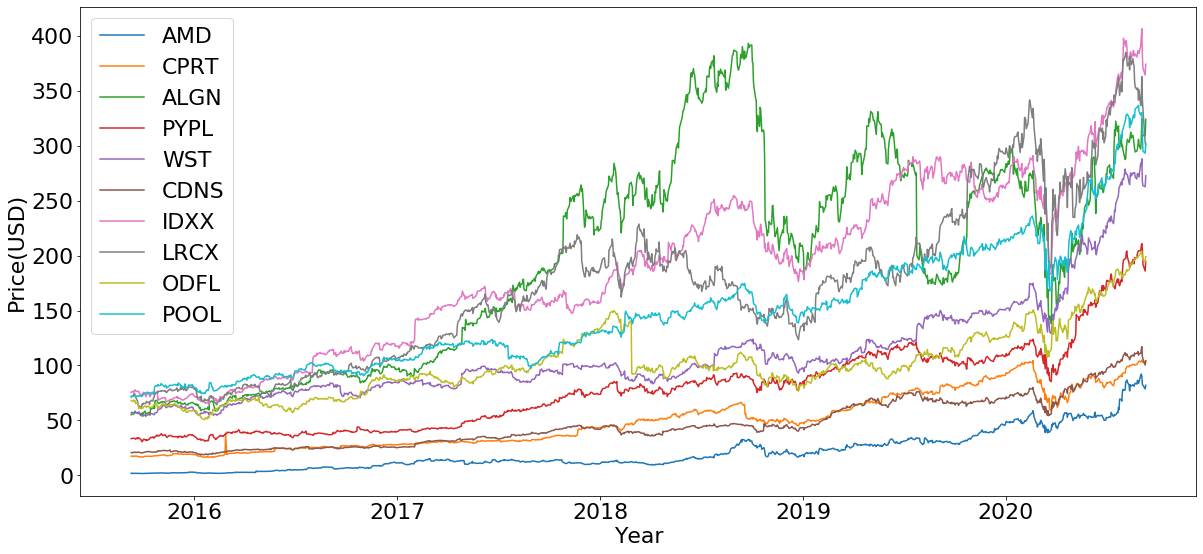

In [225]:
# grab the 5 year daily stock price for the top 10
# iterate over top 10
for stock in top_10['constituents']:
    base_url = "https://finnhub.io/api/v1/stock/candle"
    # from and to are UNIX timestamps defined as number of seconds
    # from midnight Jan 1, 1970
    # get 5 years of historical stock price
    params = {'symbol':stock,
              'resolution':'D',
              'from':start,
              'to':end,
              'token':finn_key}
    response = requests.get(base_url,params=params).json()
    # get the closing price for each day
    price = response['c']
    # convert UNIX timestamp to date
    dates = [datetime.fromtimestamp(d) for d in response['t']]
    # plot the output
    plt.plot(dates,price,label=stock)
# add legend
plt.legend()
# label the axes
plt.xlabel('Year')
plt.ylabel('Price(USD)')

Text(0, 0.5, 'Price(USD)')

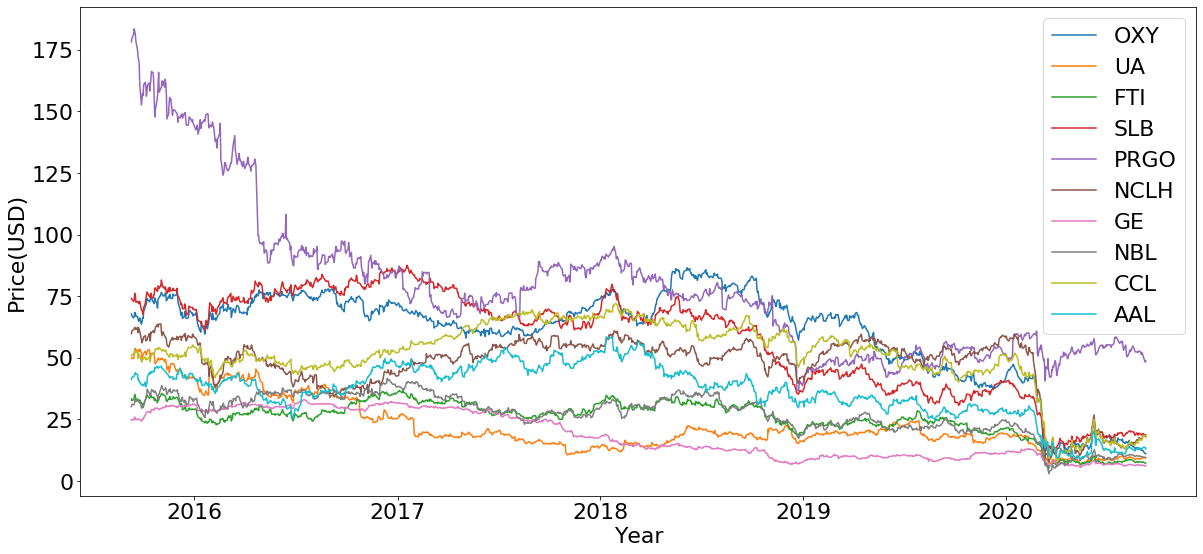

In [209]:
# grab the 5 year daily stock price for the bottom 10
# iterate over bottom 10
for stock in bottom_10['constituents']:
    base_url = "https://finnhub.io/api/v1/stock/candle"
    # from and to are UNIX timestamps defined as number of seconds
    # from midnight Jan 1, 1970
    # get 5 years of historical stock price
    params = {'symbol':stock,
              'resolution':'D',
              'from':start,
              'to':end,
              'token':finn_key}
    response = requests.get(base_url,params=params).json()
    # get the closing price for each day
    price = response['c']
    # convert date
    dates = [datetime.fromtimestamp(d) for d in response['t']]
    plt.plot(dates,price,label=stock)
# show the legend
plt.legend()
# label axes
plt.xlabel('Year')
plt.ylabel('Price(USD)')

In [250]:
# add column for industry category
top_10['industry'] = ''
# add column for company name
top_10['name'] = ''
# iterate over companies
for index, row in top_10.iterrows():
    base_url = "https://finnhub.io/api/v1/stock/profile2"
    # pull company profile information
    params = {'symbol':row.constituents,
              'token':finn_key}
    # check for good data
    try:
        response = requests.get(base_url,params=params).json()
        top_10.loc[index,'industry'] = response['finnhubIndustry']
        top_10.loc[index,'name'] = response['name']
    # print error message if there's a problem
    except:
        print("no data found")
    

top_10

,constituents,symbol,start price,stop price,diff,industry,name
209,AMD,^GSPC,1.87,74.93,40.0695,Semiconductors,Advanced Micro Devices Inc
135,CPRT,^GSPC,17.38,103.66,5.96433,Commercial Services & Supplies,Copart Inc
257,ALGN,^GSPC,57.42,320.97,5.58986,Health Care,Align Technology Inc
344,PYPL,^GSPC,32.92,176.07,5.34842,Technology,PayPal Holdings Inc
340,WST,^GSPC,56.9,277.73,4.88102,Health Care,West Pharmaceutical Services Inc
264,CDNS,^GSPC,20.81,99.76,4.79385,Technology,Cadence Design Systems Inc
204,IDXX,^GSPC,76.64,354.76,4.62891,Health Care,IDEXX Laboratories Inc
216,LRCX,^GSPC,71.22,307.21,4.31354,Semiconductors,Lam Research Corp
491,ODFL,^GSPC,43.6,184.07,4.22179,Road & Rail,Old Dominion Freight Line Inc
36,POOL,^GSPC,71.73,301.26,4.19992,Distributors,Pool Corp


([<matplotlib.patches.Wedge at 0x7fe7cfda3c18>,
 [Text(1.0461621663333946, 0.3399186987098808, 'Commercial Services & Supplies'),
  Text(0.6465637650236904, 0.8899187028927925, 'Distributors'),
  Text(-0.6465638275138399, 0.8899186574910392, 'Health Care'),
  Text(-1.0461621345079049, -0.3399187966586502, 'Road & Rail'),
  Text(-0.33991857627391525, -1.046162206115244, 'Semiconductors'),
  Text(0.8899187785623722, -0.6465636608734331, 'Technology')])

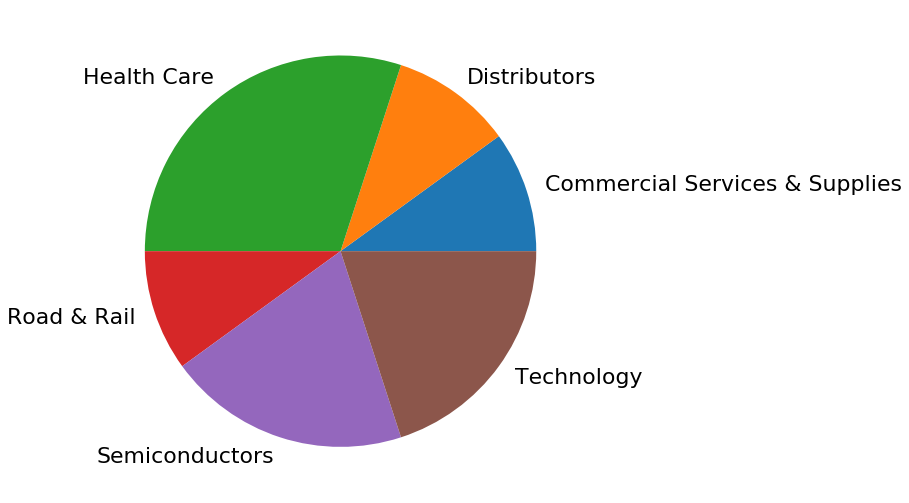

In [235]:
# make a pie chart organized by industry category
# for top 10 companies
x = top_10.groupby('industry').agg({'symbol':'count'})
plt.pie(x['symbol'],labels=x.index)

In [254]:
bottom_10['industry'] = ''
bottom_10['name'] = ''
for index, row in bottom_10.iterrows():
    base_url = "https://finnhub.io/api/v1/stock/profile2"
    params = {'symbol':row.constituents,
              'token':finn_key}
    try:
        response = requests.get(base_url,params=params).json()
        bottom_10.loc[index,'industry'] = response['finnhubIndustry']
        bottom_10.loc[index,'name'] = response['name']
    except:
        print('no data found')

# manually code in the missing entries
# https://www.google.com/finance/quote/UA:NYSE
bottom_10.iloc[1]['name'] = 'Under Armour Inc'
bottom_10.iloc[1]['industry'] = 'Clothing'
# https://www.technipfmc.com/en/what-we-do
bottom_10.iloc[2]['industry'] = 'Energy '
# https://www.slb.com/who-we-are
bottom_10.iloc[3]['industry'] = 'Energy '

bottom_10

no data found


,constituents,symbol,start price,stop price,diff,industry,name
14,OXY,^GSPC,66.81,11.65,0.174375,Energy,Occidental Petroleum Corp
334,UA,^GSPC,52.587,10.06,0.191302,Clothing,Under Armour Inc
8,FTI,^GSPC,33.28,7.43,0.223257,Energy,TechnipFMC PLC
29,SLB,^GSPC,72.54,18.73,0.258202,Energy,Schlumberger NV
263,PRGO,^GSPC,178.57,47.07,0.263594,Pharmaceuticals,Perrigo Company PLC
358,NCLH,^GSPC,61.36,16.25,0.264831,"Hotels, Restaurants & Leisure",Norwegian Cruise Line Holdings Ltd
40,GE,^GSPC,24.8,6.88,0.277419,Industrial Conglomerates,General Electric Co
349,NBL,^GSPC,31.55,9.02,0.285895,Energy,Noble Energy Inc
348,CCL,^GSPC,52.07,15.31,0.294027,"Hotels, Restaurants & Leisure",Carnival Corp
360,AAL,^GSPC,43.49,13.19,0.303288,Airlines,American Airlines Group Inc


([<matplotlib.patches.Wedge at 0x7fe7cdf6e128>,
 [Text(1.0461621663333946, 0.3399186987098808, 'Airlines'),
  Text(0.6465637650236904, 0.8899187028927925, 'Clothing'),
  Text(-0.8899187180267095, 0.6465637441936395, 'Energy '),
  Text(-0.33991862524830174, -1.0461621902025062, 'Hotels, Restaurants & Leisure'),
  Text(0.6465638483438898, -0.88991864235712, 'Industrial Conglomerates'),
  Text(1.0461621981588756, -0.33991860076110864, 'Pharmaceuticals')])

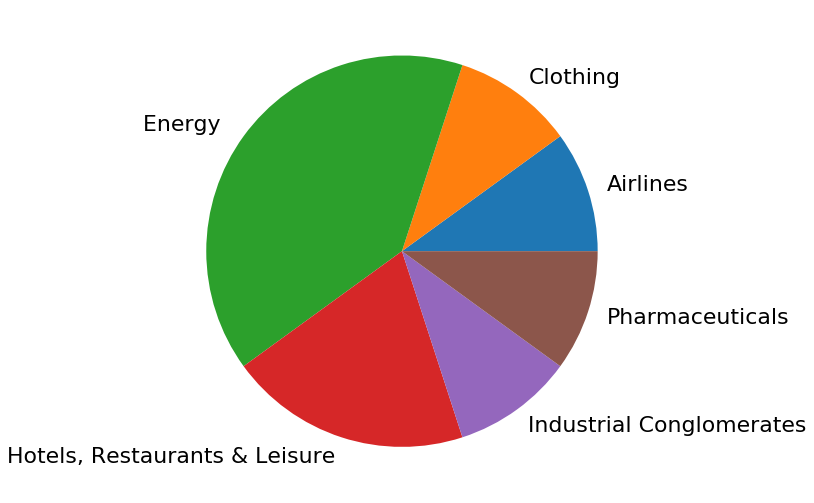

In [248]:
# make a pie chart organized by industry category
# for bottom 10 companies
x = bottom_10.groupby('industry').agg({'symbol':'count'})
plt.pie(x['symbol'],labels=x.index)